**Question:**
*Which serotypes are more ikely to cause death/DORB/referred/discharge?*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
import io
import pandas as pd
import seaborn as sns
import math

In [ ]:
data=files.upload()

Saving Pneumococcus_2009-Present_DSH_Casebase_Data.csv to Pneumococcus_2009-Present_DSH_Casebase_Data.csv


In [ ]:
df=pd.read_csv(io.StringIO(data['Pneumococcus_2009-Present_DSH_Casebase_Data.csv'].decode('utf-8')))

In [ ]:
df.drop(df[df['serotype'] == 'ND'].index, inplace = True)
df.drop(df[df['serotype'] == 'NoPCV13'].index, inplace = True)
df.drop(df[df['serotype'] == 'QNS'].index, inplace = True)
df.drop(df[df['serotype'] == 'NTD'].index, inplace = True)
df.drop(df[df['serotype'] == 'NON TYPABLE'].index, inplace = True)

In [ ]:
df.drop(columns=['year','Zila','Address','UniqueID','month','AdmDate','Age (month)','Case Definition','Discharge Date','Hospital Duration','organism'],inplace=True)

In [ ]:
df

,Outcome,serotype
0,Discharge,1
4,DORB,2
6,Discharge,1
8,Discharge,12
9,Discharge,14
...,...,...
784,Discharge,5
785,Discharge,1
786,Discharge,1
787,Discharge,1


In [ ]:
plt.rcParams['figure.figsize'] = [40,20]

*Outcome for each case with respect of serotypes*




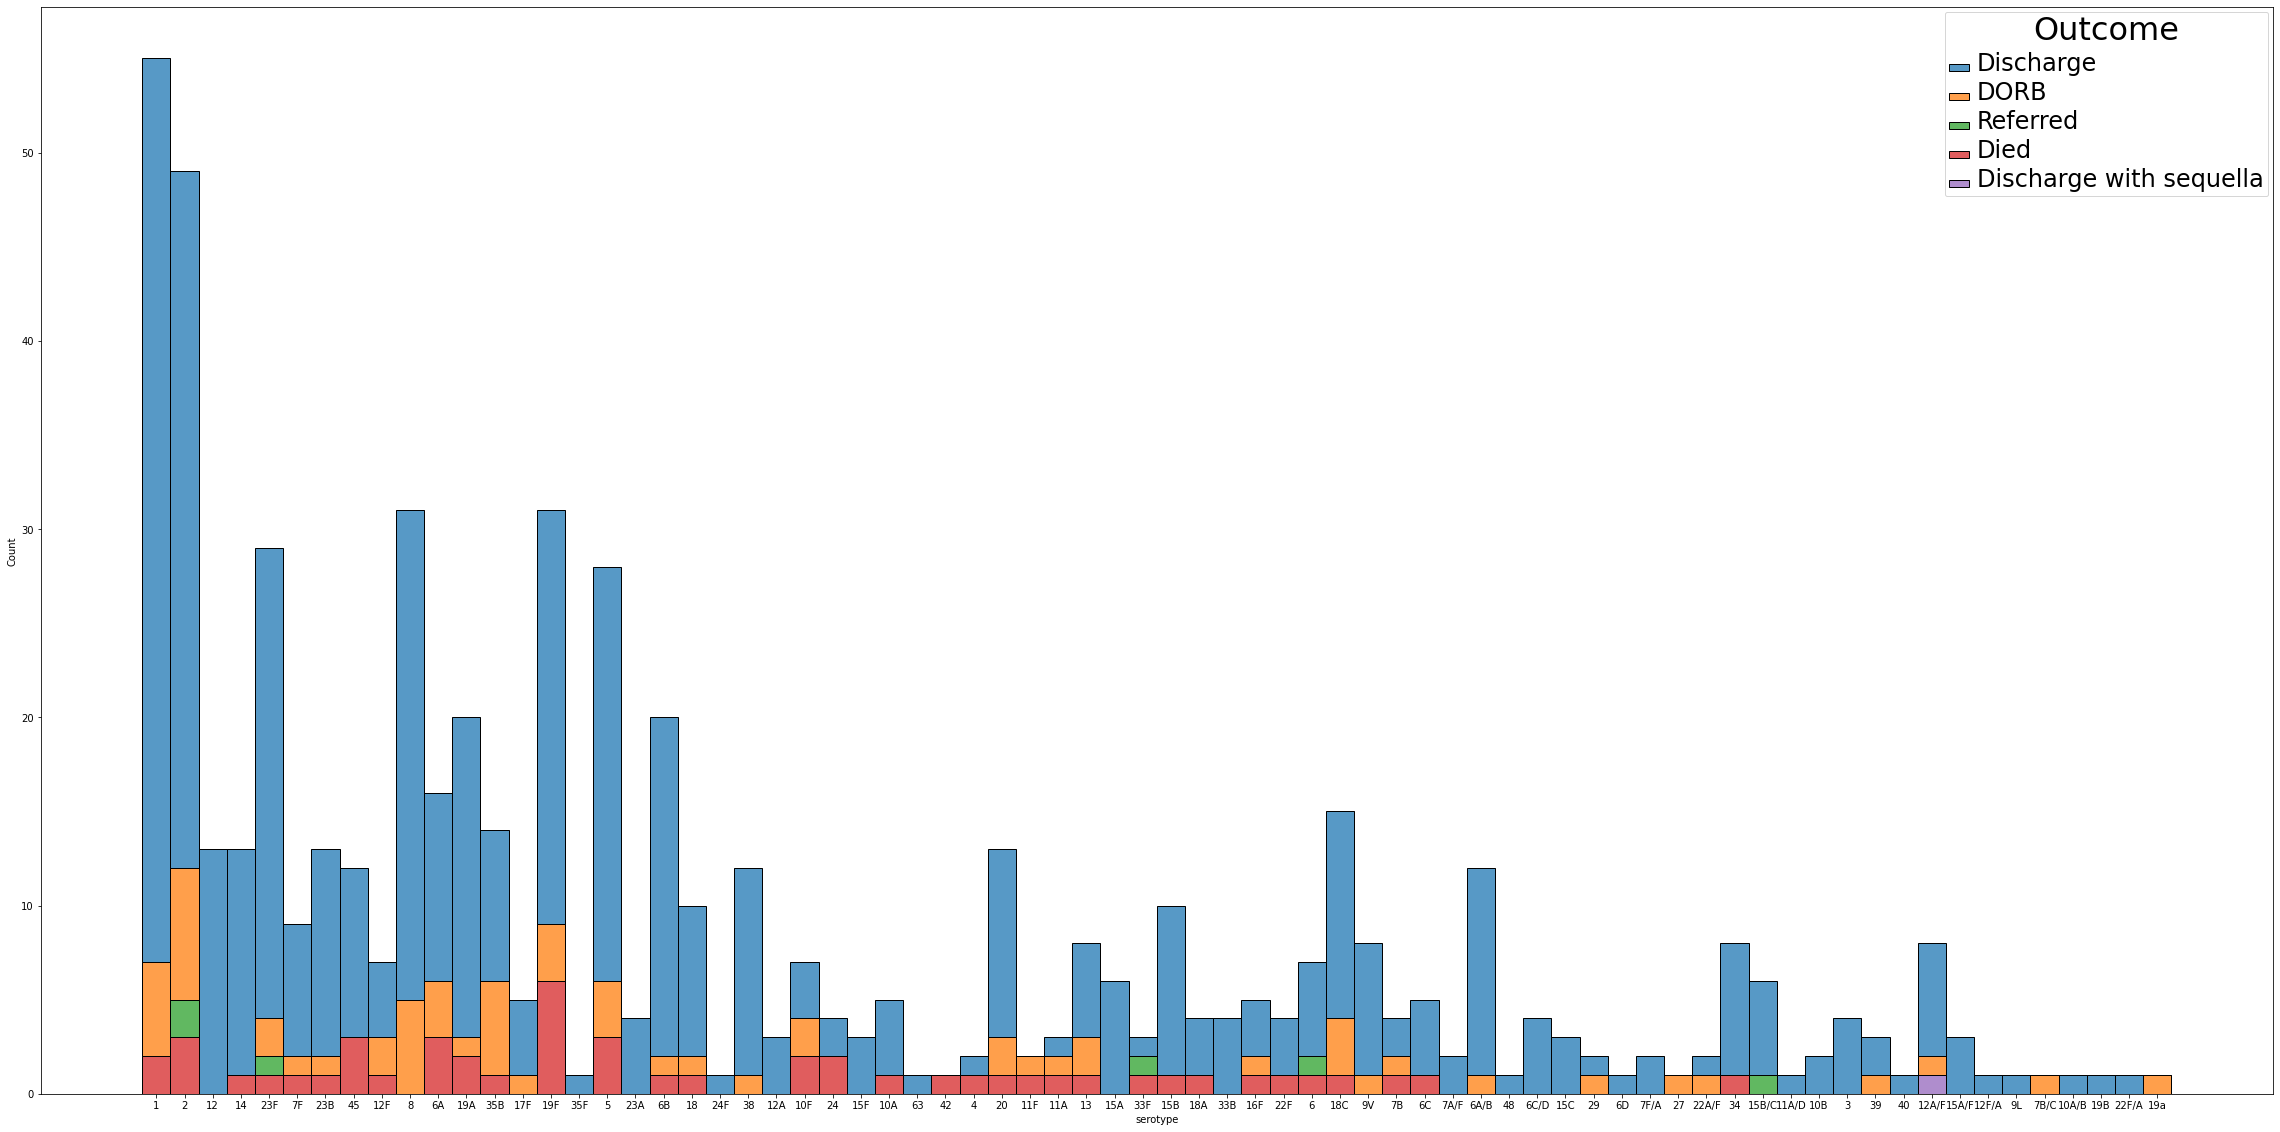

In [ ]:
sns.set(font_scale = 2)
ax=sns.histplot(binwidth=0.5, x="serotype", hue="Outcome", data=df, stat="count", multiple="stack")
plt.setp(ax.get_legend().get_texts(), fontsize='24') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
plt.xticks(rotation = 45)
#plt.grid()
plt.show()


In [ ]:
df = df.assign(Died=df['Outcome']=='Died')

In [ ]:
df.Died = df.Died.replace({True: 1, False: 0})

In [ ]:
#df2 = data.groupby('serotupe')['Meningitis'].count().unstack('quad').fillna(0)
by_comp = df.groupby("serotype")
df2=by_comp.sum()

In [ ]:
df2.reset_index()

,serotype,Died
0,1,2
1,10A,1
2,10A/B,0
3,10B,0
4,10F,2
...,...,...
67,7F,1
68,7F/A,0
69,8,0
70,9L,0


*Creating another dataframe*

In [ ]:
df4=pd.concat([df2['Died']],axis=1)
df4.reset_index()

,serotype,Died
0,1,2
1,10A,1
2,10A/B,0
3,10B,0
4,10F,2
...,...,...
67,7F,1
68,7F/A,0
69,8,0
70,9L,0


*total data for each serotype*

In [ ]:
by_comp = df.groupby("serotype")
df3=by_comp.count()
df3.reset_index()

,serotype,Outcome,Died
0,1,55,55
1,10A,5,5
2,10A/B,1,1
3,10B,2,2
4,10F,7,7
...,...,...,...
67,7F,9,9
68,7F/A,2,2
69,8,31,31
70,9L,1,1


In [ ]:
df3.rename(columns = {'Died':'Total_case_for_death'}, inplace = True)
df3

,Outcome,Total_case_for_death
serotype,,
1,55,55
10A,5,5
10A/B,1,1
10B,2,2
10F,7,7
...,...,...
7F,9,9
7F/A,2,2
8,31,31


In [ ]:
df4=pd.concat([df2['Died'],df3['Total_case_for_death']],axis=1)
df4
df4.reset_index()

,serotype,Died,Total_case_for_death
0,1,2,55
1,10A,1,5
2,10A/B,0,1
3,10B,0,2
4,10F,2,7
...,...,...,...
67,7F,1,9
68,7F/A,0,2
69,8,0,31
70,9L,0,1


*calculating the percentage of death*

In [ ]:
df4.assign(percentage=lambda x: x['Died']*100 /x['Total_case_for_death'])

,Died,Total_case_for_death,percentage
serotype,,,
1,2,55,3.636364
10A,1,5,20.000000
10A/B,0,1,0.000000
10B,0,2,0.000000
10F,2,7,28.571429
...,...,...,...
7F,1,9,11.111111
7F/A,0,2,0.000000
8,0,31,0.000000


In [ ]:
df_6=df4.reset_index().assign(percentage=lambda x: x['Died']*100 /x['Total_case_for_death'])

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
te=pd.DataFrame(df_6)
te.to_excel("Assign_03_case_for_death_.xlsx")

Importing Assign_03_case_for_death

In [ ]:
data=files.upload()

Saving Assign_03_case_for_death.csv to Assign_03_case_for_death.csv


In [ ]:
df=pd.read_csv(io.StringIO(data['Assign_03_case_for_death.csv'].decode('utf-8')))

In [ ]:
df=df.sort_values('percentage')

In [ ]:
df

,serotype,Died,Total_case_for_death,percentage
35,23A,0,4,0.000000
32,22A/F,0,2,0.000000
34,22F/A,0,1,0.000000
70,9L,0,1,0.000000
39,24F,0,1,0.000000
...,...,...,...,...
5,11A,1,3,33.333333
7,11F,1,2,50.000000
38,24,2,4,50.000000
50,4,1,2,50.000000


 **after sorting serotypes with respect to percentage**

In [ ]:
plt.rcParams['figure.figsize'] = [40,20]

/usr/local/lib/python3.8/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname F identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


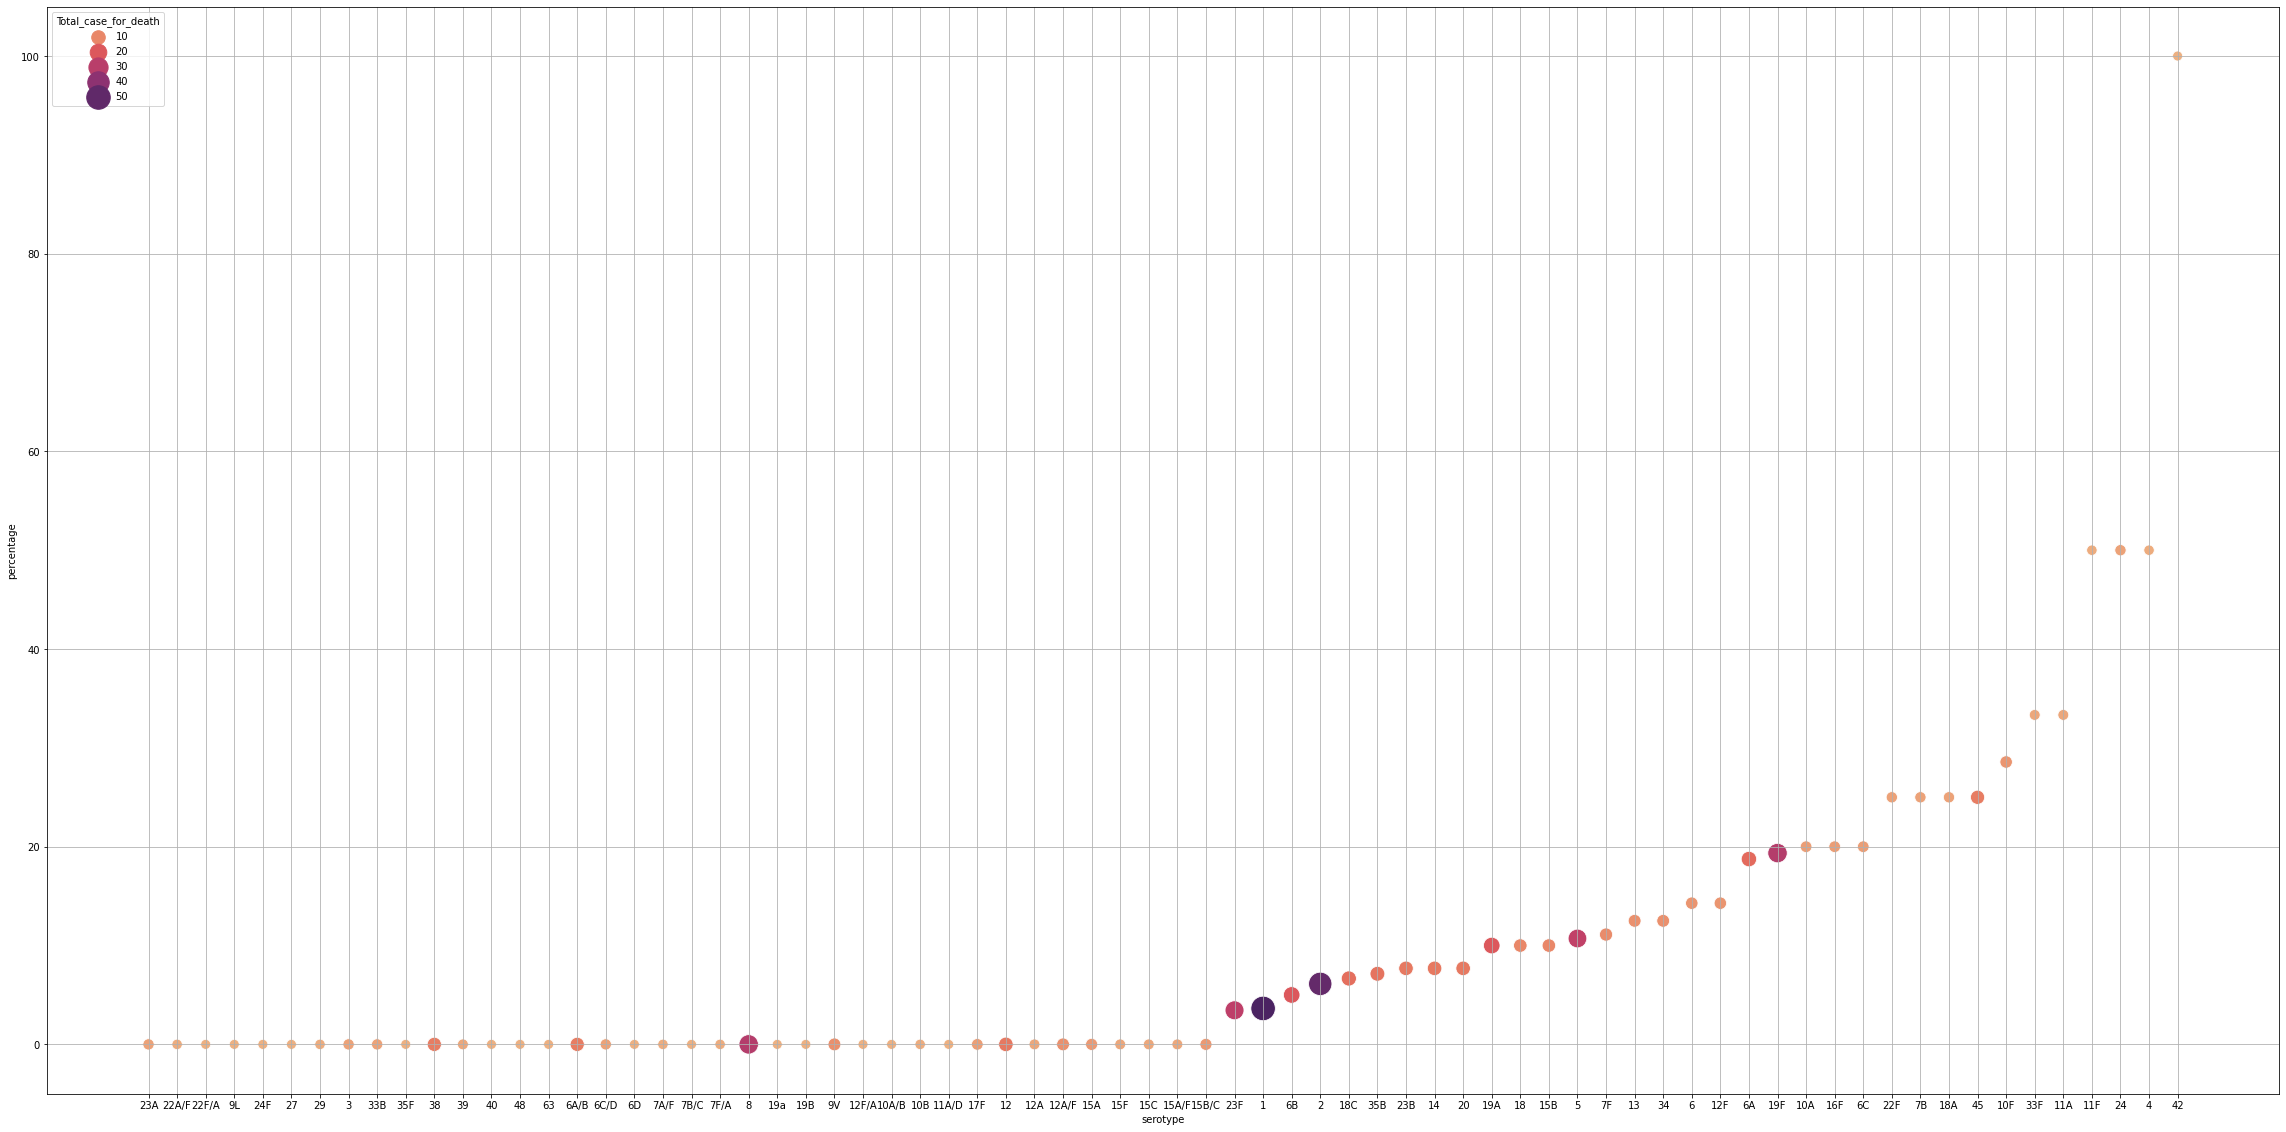

In [ ]:
sns.scatterplot(data=df, x="serotype", y="percentage", hue="Total_case_for_death",palette="flare",size="Total_case_for_death",sizes=(100, 600))
plt.grid()